In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from seaborn import heatmap


2 задание

In [3]:
# Загрузка данных Iris
wines = load_wine()
df = pd.DataFrame(data=wines.data, columns=wines.feature_names)
df['target'] = wines.target

# 1. Размерность всего датасета
dataset_shape = df.shape

# 2. Количество признаков
num_features = df.shape[1] - 1

# 3. Количество целевых классов и объектов в каждом классе
class_counts = df['target'].value_counts()

# 4. Процент объектов с неопределенными признаками
missing_percentage = df.isnull().mean() * 100

# 5. Ключевые характеристики датасета
description = df.describe()

# Выбор 3 классов и 4 количественных признаков

selected_classes = df['target'].unique()
selected_features = ['alcohol', 'ash', 'malic_acid', 'total_phenols'] # Выбираем четыре количественных признака
filtered_df = df[df['target'].isin(selected_classes)][selected_features + ['target']] # Фильтрация данных по выбранным классам и признакам
filtered_df = filtered_df.dropna() # Удаление строк с неопределенными значениями

# Вывод результатов
print("Размерность датасета:", dataset_shape)
print("\nКоличество признаков:", num_features)
print("\nКоличество целевых классов и объектов в каждом классе:")
print(class_counts)
print("\nПроцент объектов с неопределенными элементами по каждому признаку:")
print(missing_percentage)
print("\nКлючевые характеристики датасета:")
print(description)

# Отфильтрованный датасет для дальнейшего анализа
print("\nОтфильтрованный датасет без пропусков:")
print(filtered_df)

Размерность датасета: (178, 14)

Количество признаков: 13

Количество целевых классов и объектов в каждом классе:
target
1    71
0    59
2    48
Name: count, dtype: int64

Процент объектов с неопределенными элементами по каждому признаку:
alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
target                          0.0
dtype: float64

Ключевые характеристики датасета:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.4

3 задание

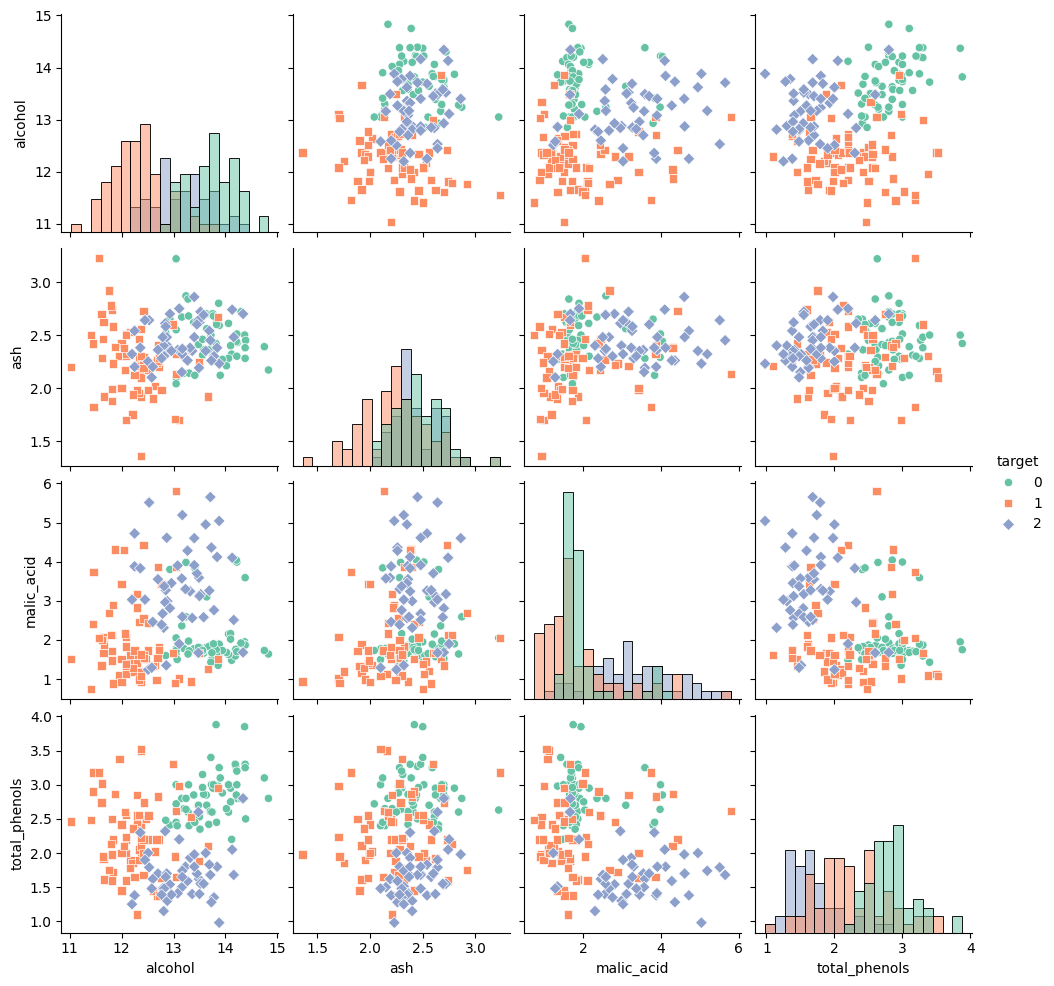

In [4]:
sn.pairplot(filtered_df, hue='target', diag_kind='hist', markers=["o", "s", "D"], palette='Set2', diag_kws={'bins': 20})
plt.show()

4 задание

In [5]:
# Соберём корреляцию признаков для каждого класса по Пирсону
corr_full = filtered_df.corr(method='pearson')
corr_0 = filtered_df[filtered_df['target'] == 0].iloc[:, :-1].corr(method='pearson')
corr_1 = filtered_df[filtered_df['target'] == 1].iloc[:, :-1].corr(method='pearson')
corr_2 = filtered_df[filtered_df['target'] == 2].iloc[:, :-1].corr(method='pearson')

print("Корреляционная матрица для всего датасета:")
print(corr_full)

print("\nКорреляционная матрица для класса 0:")
print(corr_0)

print("\nКорреляционная матрица для класса 1:")
print(corr_1)

print("\nКорреляционная матрица для класса 2:")
print(corr_2)

Корреляционная матрица для всего датасета:
                alcohol       ash  malic_acid  total_phenols    target
alcohol        1.000000  0.211545    0.094397       0.289101 -0.328222
ash            0.211545  1.000000    0.164045       0.128980 -0.049643
malic_acid     0.094397  0.164045    1.000000      -0.335167  0.437776
total_phenols  0.289101  0.128980   -0.335167       1.000000 -0.719163
target        -0.328222 -0.049643    0.437776      -0.719163  1.000000

Корреляционная матрица для класса 0:
                alcohol       ash  malic_acid  total_phenols
alcohol        1.000000 -0.148595   -0.040513       0.420687
ash           -0.148595  1.000000    0.026221       0.004802
malic_acid    -0.040513  0.026221    1.000000      -0.083514
total_phenols  0.420687  0.004802   -0.083514       1.000000

Корреляционная матрица для класса 1:
                alcohol       ash  malic_acid  total_phenols
alcohol        1.000000 -0.214851   -0.021362      -0.046321
ash           -0.214851  1.0

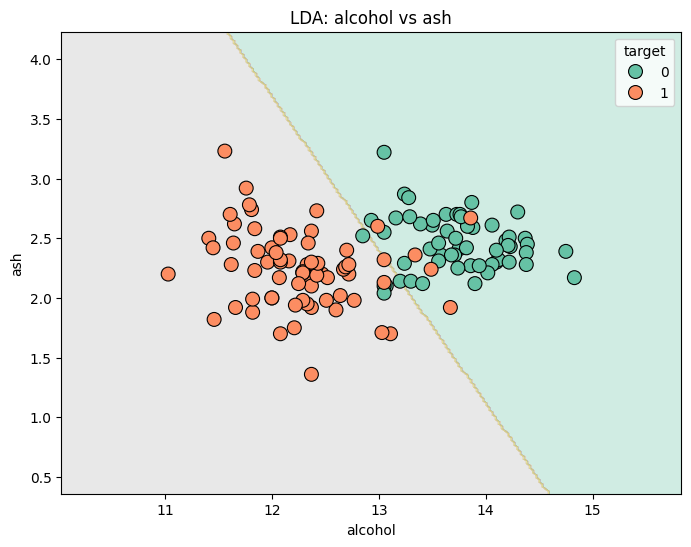

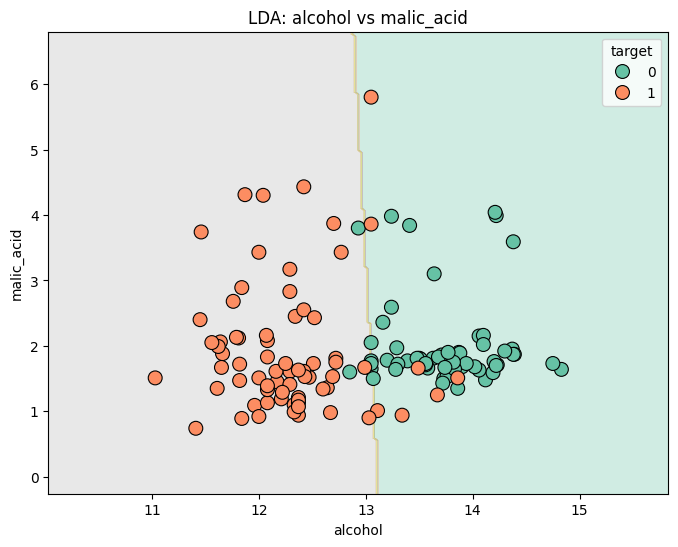

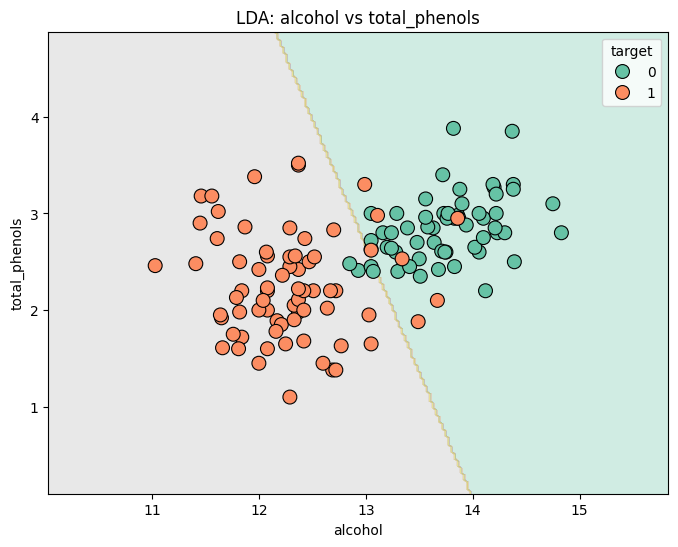

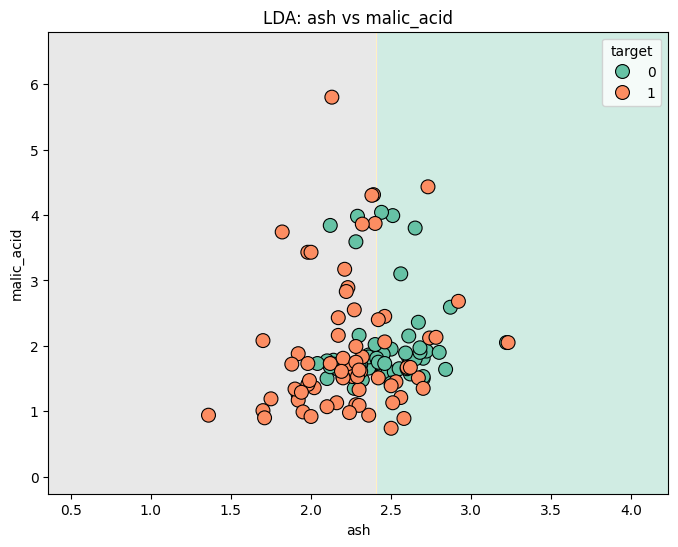

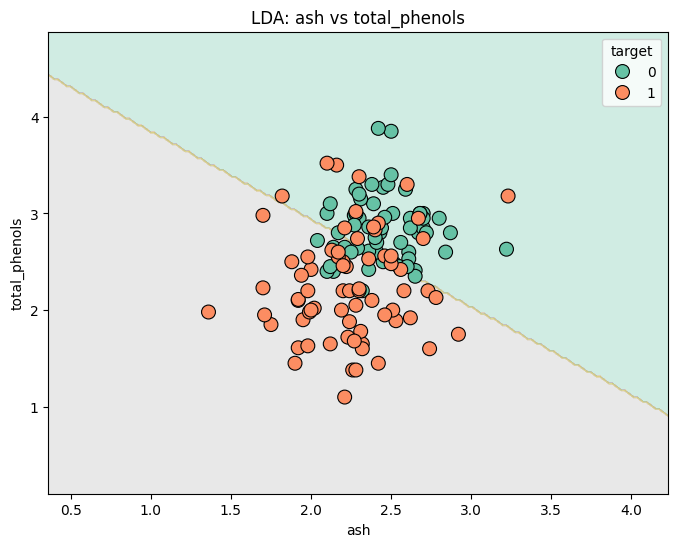

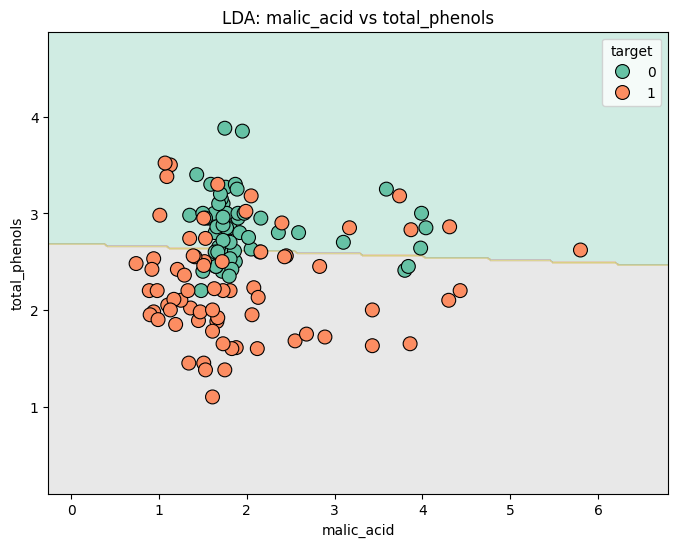

In [6]:
# Решение LDA для двух пар признаков и двух классов

# Фильтруем датасет
df_binary = filtered_df[filtered_df['target'].isin([0, 1])]

X = df_binary.iloc[:, :-1]  
y = df_binary['target']  

# Функция вывода решающего уравнения LDA
def plot_lda_decision_boundary(X, y, model, feature1, feature2):
    x_min, x_max = X[feature1].min() - 1, X[feature1].max() + 1
    y_min, y_max = X[feature2].min() - 1, X[feature2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    mesh_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=[feature1, feature2])
    Z = model.predict(mesh_df)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set2')
    sn.scatterplot(x=X[feature1], y=X[feature2], hue=y, palette='Set2', edgecolor='k', s=100)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f"LDA: {feature1} vs {feature2}")

features = X.columns

for i in range(len(features)):
    for j in range(i+1, len(features)):
        lda = LinearDiscriminantAnalysis()
        lda.fit(X[[features[i], features[j]]], y)
        plt.figure(figsize=(8, 6))
        plot_lda_decision_boundary(X[[features[i], features[j]]], y, lda, features[i], features[j])
        plt.show()

6 задание

c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


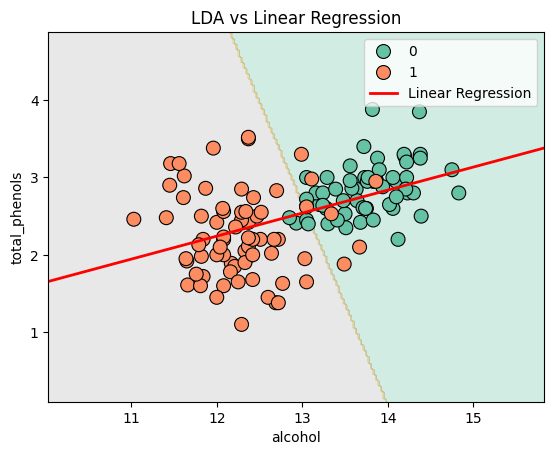

In [7]:
from sklearn.linear_model import LinearRegression

# Выберем 2 признака

selected_feature_1 = 'alcohol'
selected_feature_2 = 'total_phenols'

X = df_binary[[selected_feature_1, selected_feature_2]]  # Выбираем пару признаков
y = df_binary['target']  # Целевые классы (0 и 1)

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(X[[selected_feature_1]], X[selected_feature_2])  # Линейная регрессия для признаков

# Построение решающих границ и линий регрессии
def plot_lda_regression_boundary(X, y, lda_model, lin_reg_model):
    # Определяем область для построения решающей границы LDA
    x_min, x_max = X[selected_feature_1].min() - 1, X[selected_feature_1].max() + 1
    y_min, y_max = X[selected_feature_2].min() - 1, X[selected_feature_2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    # Прогноз для LDA
    Z = lda_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Контур для LDA
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set2')

    # Разброс данных по классам
    sn.scatterplot(x=X[selected_feature_1], y=X[selected_feature_2], hue=y, palette='Set2', edgecolor='k', s=100)

    # Линия регрессии
    x_vals = np.linspace(x_min, x_max, 200)
    y_vals = lin_reg_model.predict(x_vals.reshape(-1, 1))
    plt.plot(x_vals, y_vals, color='red', label='Linear Regression', linewidth=2)

    # Настройки графика
    plt.xlabel(selected_feature_1)
    plt.ylabel(selected_feature_2)
    plt.title('LDA vs Linear Regression')
    plt.legend()
    plt.show()

# Визуализация
plot_lda_regression_boundary(X, y, lda, lin_reg)

c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


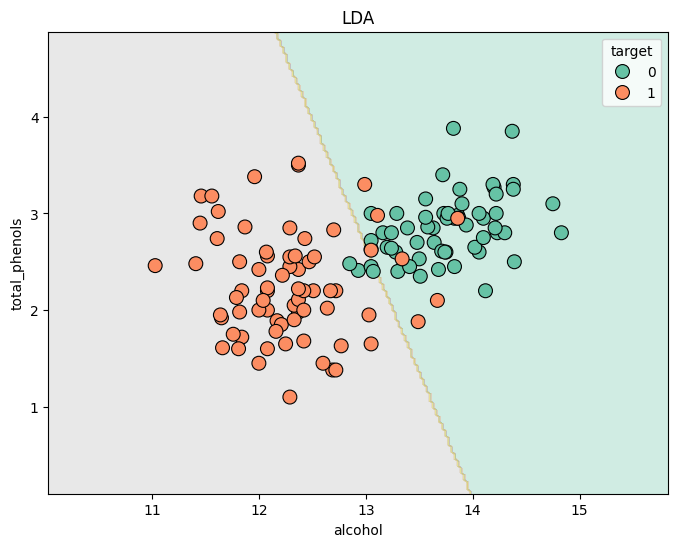

c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


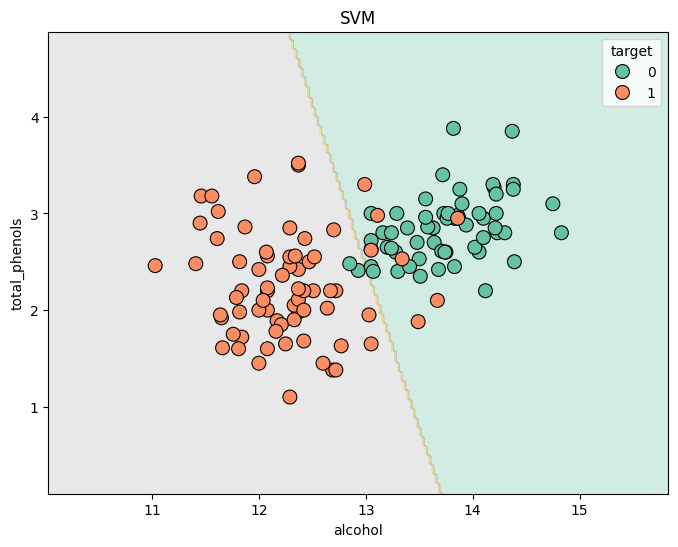

c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


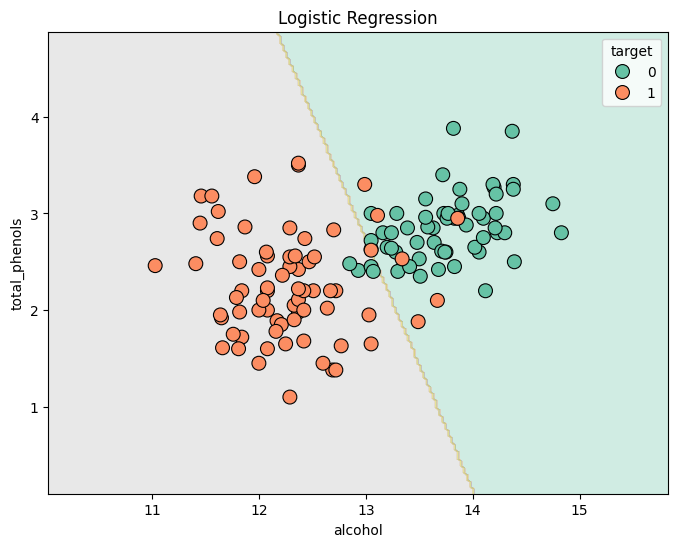

c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


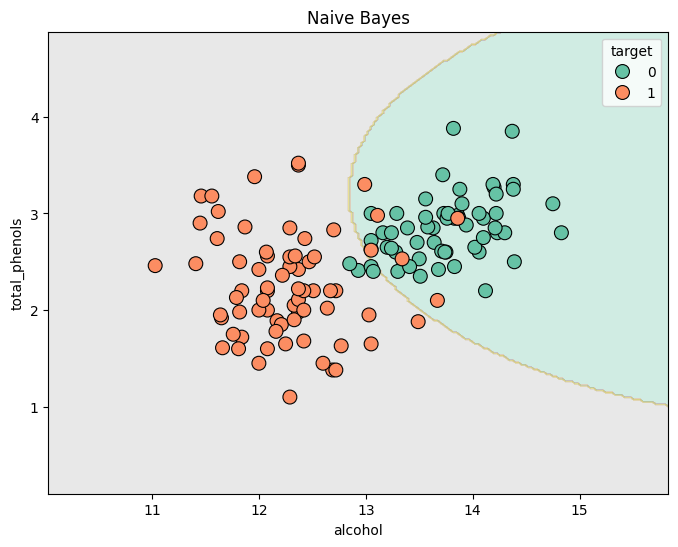

In [8]:

# Инициализируем модели
lda = LinearDiscriminantAnalysis()
svm = SVC(kernel='linear', probability=True)
log_reg = LogisticRegression()
nb = GaussianNB()

# Заводим словарь моделей
models = {
    "LDA": lda,
    "SVM": svm,
    "Logistic Regression": log_reg,
    "Naive Bayes": nb
}


def plot_boundary(X, y, model, title):
    # Определяем область для построения решающей границы LDA
    x_min, x_max = X[selected_feature_1].min() - 1, X[selected_feature_1].max() + 1
    y_min, y_max = X[selected_feature_2].min() - 1, X[selected_feature_2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    # Прогноз для LDA
    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set2')
    sn.scatterplot(x=X[selected_feature_1], y=X[selected_feature_2], hue=y, palette='Set2', edgecolor='k', s=100)
    plt.xlabel(selected_feature_1)
    plt.ylabel(selected_feature_2)
    plt.title(title)
    plt.show()

for name, model in models.items():
    plt.figure(figsize=(8, 6))
    plot_boundary(X, y, model, name)

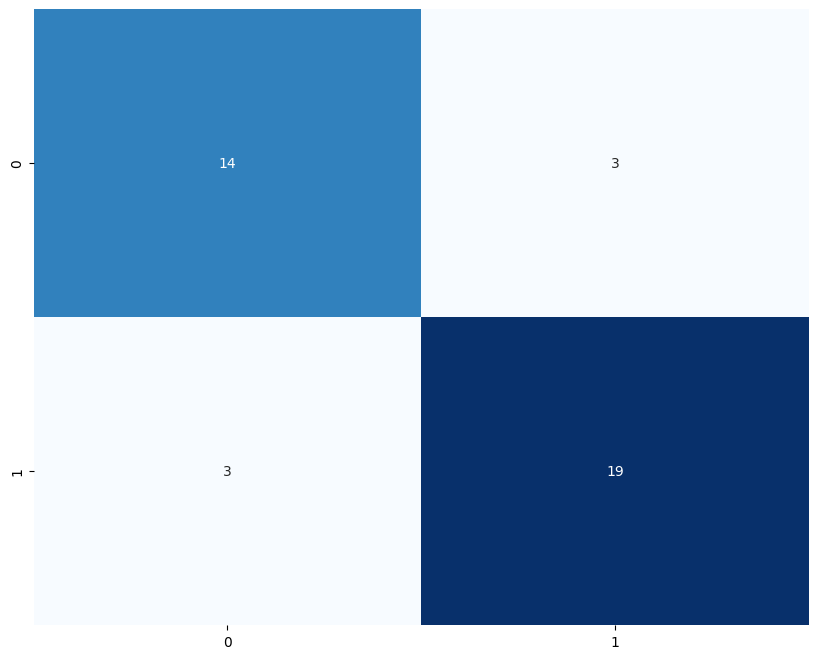

LDA - Sensitivity: 0.86, Specificity: 0.82, Precision: 0.86, Recall: 0.86


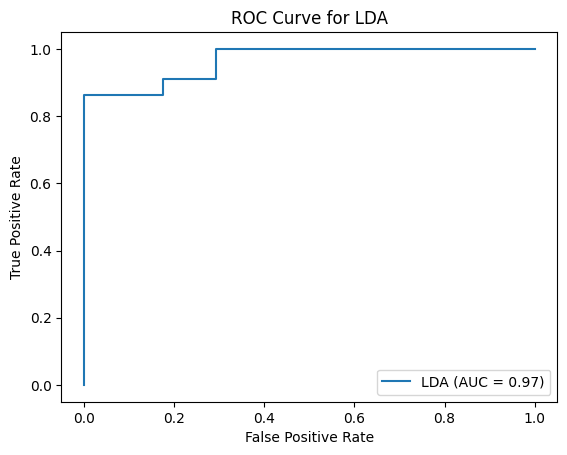

AUC for LDA: 0.97



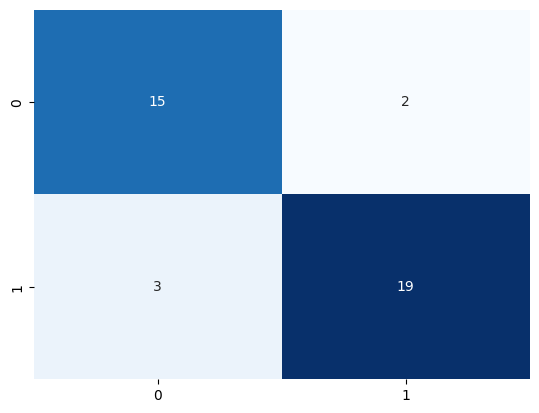

SVM - Sensitivity: 0.86, Specificity: 0.88, Precision: 0.90, Recall: 0.86


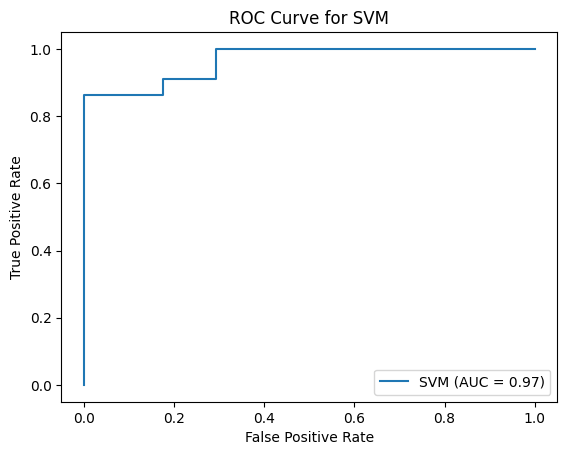

AUC for SVM: 0.97



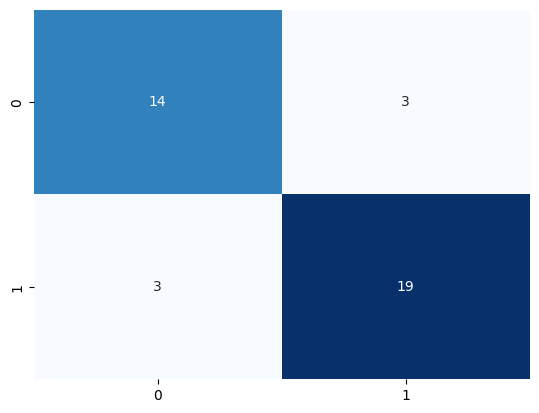

Logistic Regression - Sensitivity: 0.86, Specificity: 0.82, Precision: 0.86, Recall: 0.86


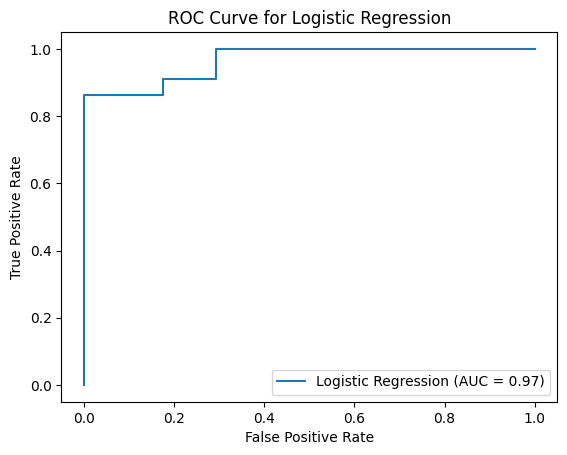

AUC for Logistic Regression: 0.97



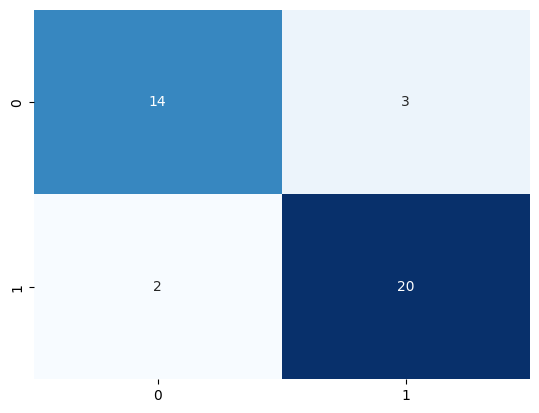

Naive Bayes - Sensitivity: 0.91, Specificity: 0.82, Precision: 0.87, Recall: 0.91


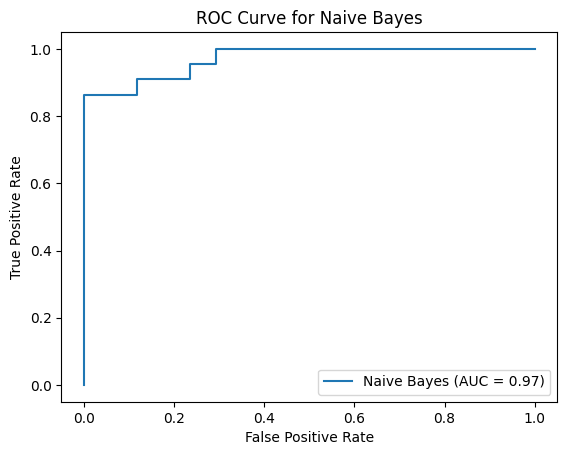

AUC for Naive Bayes: 0.97



In [9]:

def evaluate_model(name, model, X, y):
    # Разбиваем датасет
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

    # Обучение модели
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Матрица ошибок
    conf_matrix = confusion_matrix(y_test, y_pred)
    heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=["0", "1"], yticklabels=["0", "1"])
    plt.show()
    #print(f"Confusion Matrix for {name}:\n", conf_matrix)

    # Метрики
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn)  # Sensitivity or Recall
    specificity = tn / (tn + fp)  # Specificity
    precision = tp / (tp + fp)  # Precision
    recall = tp / (tp + fn)  # Recall (same as sensitivity)
    
    print(f"{name} - Sensitivity: {sensitivity:.2f}, Specificity: {specificity:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

    # ROC кривая и AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()

    return auc

plt.figure(figsize=(10, 8))
for name, model in models.items():
    auc = evaluate_model(name, model, X, y)
    print(f"AUC for {name}: {auc:.2f}\n")